<a href="https://colab.research.google.com/github/afullhart/climateanalogs/blob/main/Figures/3D_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reset -f

In [2]:
!pip install rioxarray --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.1 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Static 3d plot

(1281, 2042)
(1623570, 8)
(1623570,)
[[ 1.36961899e+00  2.47369958e-01 -1.47652799e-01 ... -1.74906213e-01
  -2.17523930e-02 -1.52261736e-01]
 [ 1.35855847e+00  3.40448980e-01 -8.86942045e-02 ...  1.46885030e-03
   1.37730781e-01  9.86333843e-02]
 [ 1.49716513e+00  6.59659779e-02 -2.22356461e-01 ...  5.61956449e-02
  -5.95402660e-03  3.32303419e-02]
 ...
 [ 1.38875170e+00  1.06573328e-01  2.45514988e-01 ... -4.51040972e-02
   2.44855199e-03 -3.73039423e-02]
 [ 1.57255019e+00  6.44243215e-01 -2.59520517e-01 ...  7.55123939e-02
  -1.30519904e-01  1.24208932e-01]
 [ 1.52776052e+00  5.29106940e-01 -5.51931953e-03 ...  1.23539972e-01
  -3.10989826e-02 -1.37176900e-01]]


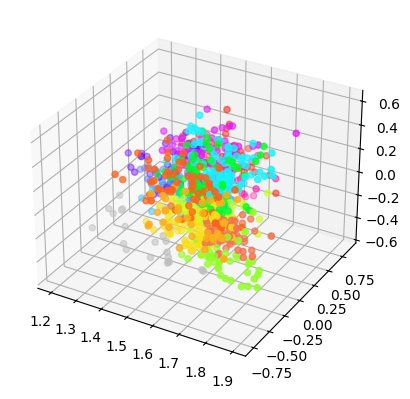

In [7]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rioxarray as rx
import os

colors = ['#91FE28', '#F4714F', '#FF611B', '#FBAF1C', '#F8E019', '#CCFE29', '#BDBEBE', '#00FE24', '#18F2FE', '#3AC2FD', '#5E79FD', '#6E12FC', '#E21DFD', '#FF18A9', '#FF2B18']
custom_grad = LinearSegmentedColormap.from_list('my_gradient', colors, N=15)

isof = '/content/drive/My Drive/Colab Notebooks/Analogs/IsoCluster.tif'
pcaf = '/content/drive/My Drive/Colab Notebooks/Analogs/PCA_Test'

iso_im = rx.open_rasterio(isof)
arr = iso_im.values
mask = (arr[0, :, :] >= 1) & (arr[0, :, :] <= 15)
print(mask.shape)

com_im = rx.open_rasterio(os.path.join(pcaf, 'MultidimRasterLyr_d_pc.tif'))
arr = com_im.values
shp = com_im.values.shape
new_arr = []
for i in range(shp[0]):
  filtered_arr = arr[i, :, :][mask]
  new_arr.append(filtered_arr)

X = np.array(new_arr).transpose()

iso_im = rx.open_rasterio(isof)
arr = iso_im.values
filtered_arr = arr[0, :, :][mask]
cluster_labels = filtered_arr

print(X.shape)
print(cluster_labels.shape)

rng = np.random.default_rng(seed=123)
rnd_idxs = rng.choice(list(range(X.shape[0])), size=1000)
X_sample = X[rnd_idxs]
cluster_label_sample = cluster_labels[rnd_idxs]

print(X_sample)

pca1 = X_sample[:,0]
pca2 = X_sample[:,1]
pca3 = X_sample[:,2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(pca1, pca2, pca3, c=cluster_label_sample, cmap=custom_grad)

plt.show()


### Interactive 3d plot

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import rioxarray as rx
import os

colors = ['#91FE28', '#F4714F', '#FF611B', '#FBAF1C', '#F8E019', '#CCFE29', '#BDBEBE', '#00FE24', '#18F2FE', '#3AC2FD', '#5E79FD', '#6E12FC', '#E21DFD', '#FF18A9', '#FF2B18']
custom_grad = LinearSegmentedColormap.from_list('my_gradient', colors, N=15)

isof = '/content/drive/My Drive/Colab Notebooks/Analogs/IsoCluster.tif'
pcaf = '/content/drive/My Drive/Colab Notebooks/Analogs/PCA_Test'

iso_im = rx.open_rasterio(isof)
arr = iso_im.values
mask = (arr[0, :, :] >= 1) & (arr[0, :, :] <= 15)
print(mask.shape)

com_im = rx.open_rasterio(os.path.join(pcaf, 'MultidimRasterLyr_d_pc.tif'))
arr = com_im.values
shp = com_im.values.shape
new_arr = []
for i in range(shp[0]):
  filtered_arr = arr[i, :, :][mask]
  new_arr.append(filtered_arr)

X = np.array(new_arr).transpose()

iso_im = rx.open_rasterio(isof)
arr = iso_im.values
filtered_arr = arr[0, :, :][mask]
cluster_labels = filtered_arr

print(X.shape)
print(cluster_labels.shape)

rng = np.random.default_rng(seed=123)
rnd_idxs = rng.choice(list(range(X.shape[0])), size=20000)
X_sample = X[rnd_idxs]
cluster_label_sample = cluster_labels[rnd_idxs]

print(X_sample)

pca1 = X_sample[:,0]
pca2 = X_sample[:,1]
pca3 = X_sample[:,2]

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=pca1, y=pca2, z=pca3, mode='markers',
  marker=dict(size=6, color=cluster_label_sample, colorscale=colors, symbol='circle'),
  name='blue'))

fig.show()

fig.write_html('/content/drive/My Drive/Colab Notebooks/Analogs/interactive_plot.html')




### Calculate outlier percentage

In [17]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rioxarray as rx
import os


isof = '/content/drive/My Drive/Colab Notebooks/Analogs/IsoCluster.tif'
pcaf = '/content/drive/My Drive/Colab Notebooks/Analogs/PCA_Test'

iso_im = rx.open_rasterio(isof)
arr = iso_im.values
mask = (arr[0, :, :] >= 1) & (arr[0, :, :] <= 15)
print(mask.shape)

com_im = rx.open_rasterio(os.path.join(pcaf, 'MultidimRasterLyr_d_pc.tif'))
arr = com_im.values
shp = com_im.values.shape
new_arr = []
for i in range(shp[0]):
  filtered_arr = arr[i, :, :][mask]
  new_arr.append(filtered_arr)

X = np.array(new_arr).transpose()

print(X.shape)

thing = X[:,0]
print(thing.shape)

outliers = 0
n = 0
for i in range(X.shape[1]):
  mean = np.mean(X[:,i])
  sdev = np.std(X[:,i])
  l = X[:,i]
  for x in l:
    if x >= mean + (6*sdev) or x <= mean - (6*sdev):
      outliers += 1
    n += 1

print(outliers/n*100.0)
print(n)



(1281, 2042)
(1623570, 8)
(1623570,)
0.010478451806820771
12988560


### Project centroids onto 3d space

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import rioxarray as rx
import os

colors = ['#91FE28', '#F4714F', '#FF611B', '#FBAF1C', '#F8E019', '#CCFE29', '#BDBEBE', '#00FE24', '#18F2FE', '#3AC2FD', '#5E79FD', '#6E12FC', '#E21DFD', '#FF18A9', '#FF2B18']
custom_grad = LinearSegmentedColormap.from_list('my_gradient', colors, N=15)



isof = '/content/drive/My Drive/Colab Notebooks/Analogs/IsoCluster.tif'
pcaf = '/content/drive/My Drive/Colab Notebooks/Analogs/PCA_Test'

iso_im = rx.open_rasterio(isof)
arr = iso_im.values
mask = (arr[0, :, :] >= 1) & (arr[0, :, :] <= 15)
print(mask.shape)

com_im = rx.open_rasterio(os.path.join(pcaf, 'MultidimRasterLyr_d_pc.tif'))
arr = com_im.values
shp = com_im.values.shape
new_arr = []
for i in range(shp[0]):
  filtered_arr = arr[i, :, :][mask]
  new_arr.append(filtered_arr)

X = np.array(new_arr).transpose()
print(X.shape)

iso_im = rx.open_rasterio(isof)
arr = iso_im.values
filtered_arr = arr[0, :, :][mask]
cluster_labels = filtered_arr


outliers = 0
n = 0
coords = []
for i in range(15):
  label_idxs = []
  for j in range(len(cluster_labels)):
    if cluster_labels[j] == i + 1:
      label_idxs.append(j)
  print(len(label_idxs))
  label_X = X[label_idxs, :]
  print(label_X.shape)

  centroids = []
  for j in range(8):
    centrd = np.mean(label_X[:,j])
    centroids.append(centrd)

  coords.append(centroids)

print(len(coords))
print(coords)
print(len(coords[0]))


X_sample = np.array(coords)
print(X_sample.shape)

pca1 = X_sample[:,0]
pca2 = X_sample[:,1]
pca3 = X_sample[:,2]

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=pca1, y=pca2, z=pca3, mode='markers',
  marker=dict(size=6, color=list([i+1 for i in range(15)]), colorscale=colors, symbol='circle'),
  name='blue'))

fig.show()

fig.write_html('/content/drive/My Drive/Colab Notebooks/Analogs/interactive_plot.html')



### Project centroids onto 2d space

In [10]:
from matplotlib.colors import LinearSegmentedColormap
import plotly.express as px
import numpy as np
import pandas as pd
import rioxarray as rx
import os

colors = ['#91FE28', '#F4714F', '#FF611B', '#FBAF1C', '#F8E019', '#CCFE29', '#BDBEBE', '#00FE24', '#18F2FE', '#3AC2FD', '#5E79FD', '#6E12FC', '#E21DFD', '#FF18A9', '#FF2B18']
custom_grad = LinearSegmentedColormap.from_list('my_gradient', colors, N=15)



isof = '/content/drive/My Drive/Colab Notebooks/Analogs/IsoCluster.tif'
pcaf = '/content/drive/My Drive/Colab Notebooks/Analogs/PCA_Test'

iso_im = rx.open_rasterio(isof)
arr = iso_im.values
mask = (arr[0, :, :] >= 1) & (arr[0, :, :] <= 15)
print(mask.shape)

com_im = rx.open_rasterio(os.path.join(pcaf, 'MultidimRasterLyr_d_pc.tif'))
arr = com_im.values
shp = com_im.values.shape
new_arr = []
for i in range(shp[0]):
  filtered_arr = arr[i, :, :][mask]
  new_arr.append(filtered_arr)

X = np.array(new_arr).transpose()
print(X.shape)

iso_im = rx.open_rasterio(isof)
arr = iso_im.values
filtered_arr = arr[0, :, :][mask]
cluster_labels = filtered_arr


outliers = 0
n = 0
coords = []
for i in range(15):
  label_idxs = []
  for j in range(len(cluster_labels)):
    if cluster_labels[j] == i + 1:
      label_idxs.append(j)
  print(len(label_idxs))
  label_X = X[label_idxs, :]
  print(label_X.shape)

  centroids = []
  for j in range(8):
    centrd = np.mean(label_X[:,j])
    centroids.append(centrd)

  coords.append(centroids)

print(len(coords))
print(coords)
print(len(coords[0]))


X_sample = np.array(coords)
print(X_sample.shape)


pca2 = X_sample[:,1]
pca3 = X_sample[:,2]

df = pd.DataFrame(dict(x=pca2, y=pca3))

fig = px.scatter(df, x="x", y="y", title="Static Scatter Plot")

fig.show()

#color=list([i+1 for i in range(15)])
#symbol='circle'

(1281, 2042)
(1623570, 8)
75438
(75438, 8)
96937
(96937, 8)
95793
(95793, 8)
67829
(67829, 8)
142033
(142033, 8)
172277
(172277, 8)
55055
(55055, 8)
131765
(131765, 8)
150316
(150316, 8)
164289
(164289, 8)
151927
(151927, 8)
54280
(54280, 8)
102930
(102930, 8)
82523
(82523, 8)
80178
(80178, 8)
15
[[np.float64(1.747399402266977), np.float64(-0.3140084924743682), np.float64(-0.2465981763433002), np.float64(-0.049553537454574144), np.float64(-0.10991485043038911), np.float64(0.06674538713311752), np.float64(-0.05218151899440881), np.float64(-0.030183296833192208)], [np.float64(1.7126365140194122), np.float64(-0.1545765684271376), np.float64(-0.13721333612263922), np.float64(-0.13753802569855722), np.float64(-0.02662457867822212), np.float64(-0.0164613782993195), np.float64(-0.010338362517771559), np.float64(0.016340468485184462)], [np.float64(1.5690724570154209), np.float64(-0.29992744752705275), np.float64(0.2487536293000056), np.float64(-0.027634554705290033), np.float64(0.2171329889031